# Goals - Using charts to visualize the accounting system of Hyperdive

[] buying PTs

[] selling PTs

[] opening shorts

[] closing shorts

[] providing lp

[] removing lp

[] show that bond/share reserves go up & down

[] show that buffers go up & down

[] plot PNL for LPer & agents

$$
k = \frac{c}{\mu} \cdot (\mu \cdot (z + \Delta z))^{1 - \tau(d_b)} + (y +s - \Delta y')^{1 - \tau(d_b)}.
$$
Solving for $\Delta y$,
$$
\Delta y' = y+s - (k - \frac{c}{\mu} \cdot (\mu \cdot (z + \Delta z))^{1-\tau(d_b)})^{\frac{1}{1-\tau(d_b)}}
$$

In [27]:
## Market State
z = share_reserves = 100_000
y = bond_reserves = 100_000
c = share_price = 1
u = init_share_price = 1
phi = fee = 0.01
d = 182.5 # days remaining
r = pool_apy = 0.05


## Trade Details
delta_x = 10_000 # same amount regardless of units
delta_z = delta_x / c

## Calculate Trade 
# t(d) = days_remaining / 365 
t = t_d = d / 365
t_stretch = 3.09396 / (0.02789 * (r * 100))
tau = t_d / t_stretch

## the k constant
k = (c / u) * (u * z) ** (1 - tau) + (2 * y + c * z) ** (1 - tau)

delta_y = 2*y + c*z - (k - (c / u) * (u * (z + delta_z))**(1 - tau))**(1 / (1 - tau)) 

## Update Market State
share_reserves_after = share_reserves + delta_z
bond_reserves_after = bond_reserves - delta_y

/var/folders/fx/qlfllj2n1kz9z0c7_mn_8d2w0000gn/T/ipykernel_58897/2002749828.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(['Share', 'Bond'])


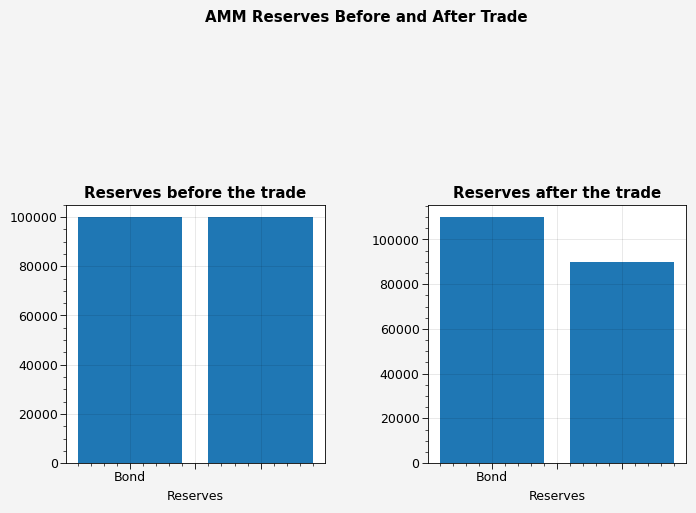

In [34]:
import elfpy.utils.outputs as output_utils  # utilities for file outputs 
# side by side chart
nrows = 1
ncols = 2

fig, axes, _ = output_utils.get_gridspec_subplots(nrows, ncols, wspace=0.4)
reserves = [share_reserves, bond_reserves] 
reserves_after = [share_reserves_after, bond_reserves_after] 
axes[0].bar(range(len(reserves)), reserves)
axes[1].bar(range(len(reserves_after)), reserves_after)
axes[0].set_title("Reserves before the trade")
axes[1].set_title("Reserves after the trade")

for axis in axes:
    axis.set_xlabel("Reserves")
    axis.set_xticklabels(['Share', 'Bond'])
    axis.set_box_aspect(1)
fig_scale = 2
fig_size = fig.get_size_inches()  # [width (or cols), height (or rows)]
fig.set_size_inches([fig_scale * fig_size[0], fig_scale * fig_size[1]])
_ = fig.suptitle("AMM Reserves Before and After Trade", y=0.90)

In [25]:
# to a hammer, everything looks like a nail
# insert your preferred hammer here

In [30]:
import elfpy.utils.outputs as output_utils  # utilities for file outputs


# from test_market.py (the best test)
def create_simulator(
    self,
    agent_policies,
    config_file="config/example_config.toml",
):
    """Create base structure for future tests"""
    output_utils.setup_logging(log_filename=".logging/test_trades.log", log_level=logging.DEBUG)
    # load default config
    override_dict = {
        "pricing_model_name": "Yieldspace",
        "target_liquidity": 10e6,
        "fee_percent": 0.1,
        "target_pool_apr": 0.05,
        "vault_apr": {"type": "constant", "value": 0.05},
        # minimal simulation steps, we only care to investigate the first day's trades
        "num_trading_days": 10,
        "num_blocks_per_day": 3,
        "shuffle_users": False,  # make it deterministic
    }
    simulator = test_utils.setup_simulation_entities(
        config_file=config_file, override_dict=override_dict, agent_policies=agent_policies
    )
    return simulator